In [43]:
import re
from synthdat_generate import *
from rdkit import Chem
from rdkit.Chem import rdqueries, GraphDescriptors
from rdkit.Chem.Draw import IPythonConsole

# Code

In [11]:
# generate linear surfactant-like structures
AB_linear(10) # A,B represent tail/head arbitrarily

['AAAAAABBBB', 'AAAAAAABBB', 'AAAAAAAABB', 'AAAAAAAAAB']

In [12]:
# generate surfactant-like structures with a single branch
AB_multibranch(10,'C',1)

['AAAAAABB(C)BB', 'AA(C)AAAAABBB', 'AAAAAAA(C)ABB', 'AAAAAAA(C)AAB']

In [13]:
# generate surfactant-like structures with two branches
AB_multibranch(10,'C',2)

['AA(C)AAAA(C)BBBB',
 'AAAAAAABB(C)(C)B',
 'AAAAAA(C)A(C)ABB',
 'AAAAAA(C)(C)AAAB']

In [19]:
# combined different structures and convert to chemical structures through SMILES strings

# generate three different base structures
synthdat = []
for i in range(10,41):
    synthdat += AB_linear(i)
    synthdat += AB_multibranch(i,"C",1)
    synthdat += AB_multibranch(i, "C",2)

# replace AB with actual atoms
synthdat_temp = []
for i,synthmol in enumerate(synthdat):
    temp = re.sub("C","CC",synthmol)
    temp = re.sub("A","C",temp)
    temp = re.sub("B","OCC",temp)
    temp = temp + "O"
    temp = Chem.MolToSmiles(Chem.MolFromSmiles(temp)) # convert to canonical SMILES
    synthdat_temp.append(temp)
synthdat = synthdat_temp.copy()
print(len(synthdat) != len(set(synthdat))) # check duplicates (False indicates no duplicates)

False


In [20]:
synthdat_ring = []
for i in range(10,41):
    synthdat_ring += AB_linear(i)
synthdat_temp = []
for i,synthmol in enumerate(synthdat_ring):
    temp = re.sub("A","C",synthmol)
    temp = re.sub("B","OCC",temp)
    temp = temp + "O"
    temp = Chem.MolToSmiles(Chem.MolFromSmiles(temp)) # convert to canonical SMILES
    synthdat_temp.append(temp)
synthdat_ring = synthdat_temp.copy()
synthdat_ring = add_ring(synthdat_ring,6,'C')
synthdat_rbranch = add_branch(synthdat_ring,'(C)')
synthdat_ring.extend(synthdat_rbranch)
invalid_structure = []
for i,synthmol in enumerate(synthdat_ring):
    m = Chem.MolFromSmiles(synthmol)
    if m is None:
        print("Invalid structure", i, synthmol)
        invalid_structure.append(i)    
synthdat_temp = []
for i,synthmol in enumerate(synthdat_ring):
    temp = Chem.MolToSmiles(Chem.MolFromSmiles(synthmol)) # convert to canonical SMILES
    synthdat_temp.append(temp) 
synthdat_ring = synthdat_temp.copy()
print(len(synthdat_ring) != len(set(synthdat_ring))) # check duplicates if true there are duplicates  
synthdat.extend(synthdat_ring)   
print(len(synthdat) != len(set(synthdat))) # check duplicates if true there are duplicates  

False
False


In [21]:
# length of the dataset
len(synthdat)

1820

In [38]:
# calculate the topological descriptors of an molecule
sample = synthdat[0]

In [39]:
sample

'CCCCCCOCCOCCOCCOCCO'

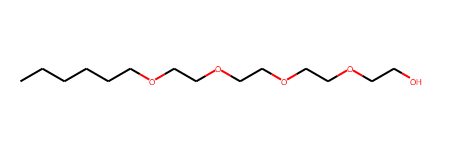

In [40]:
sample_mol = Chem.MolFromSmiles(sample)
sample_mol

In [41]:
q = rdqueries.AtomNumEqualsQueryAtom(6)
num_C = len(sample_mol.GetAtomsMatchingQuery(q))
q = rdqueries.AtomNumEqualsQueryAtom(8)
num_O = len(sample_mol.GetAtomsMatchingQuery(q))
num_ring = sample_mol.GetRingInfo().NumRings()
print('#C: {}, #O: {}, #ring: {}'.format(num_C, num_O, num_ring))

#C: 14, #O: 5, #ring: 0


In [47]:
balaban_J = Chem.GraphDescriptors.BalabanJ(sample_mol)
bertz_CT = Chem.GraphDescriptors.BertzCT(sample_mol)
print('Balaban J: {:.2f}, Bertz CT: {:.2f}'.format(balaban_J, bertz_CT))

Balaban J: 2.88, Bertz CT: 138.77
